In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## EDA

In [7]:
colums_todrop = ["Name","Fare"]
titanic.drop(colums_todrop, axis="columns", inplace=True)

In [9]:
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Sibsp','Parch']
titanic.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [11]:
titanic.shape

(887, 6)

In [12]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Sibsp         int64
Parch         int64
dtype: object

In [14]:
titanic.Sex=titanic.Sex.apply(lambda x:1 if x=="male" else 0)
titanic.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Entrenamiento

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [17]:
## separamos  e y
x = titanic.drop("Survived", axis=1)
y = titanic.Survived

In [23]:
## 30% para test y 70 para entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=00000)

In [24]:
## creacion de modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [25]:
## Entrenamiento del modelo
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Evaluacion del modelo

In [28]:
## Calculode las predicciones en train y test
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [31]:
## calculo del accuracy en train
train_accuracy = accuracy_score(y_train, y_train_pred)

##claculo del accuracy en train
train_accuraccy = accuracy_score(y_train, y_train_pred)

## Calculo del accuracy en test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es ', train_accuraccy)
print('El accuracy en test es ', test_accuracy)

el accuracy en train es  0.8048387096774193
el accuracy en test es  0.7640449438202247


## Feature importances

/home/danel149/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


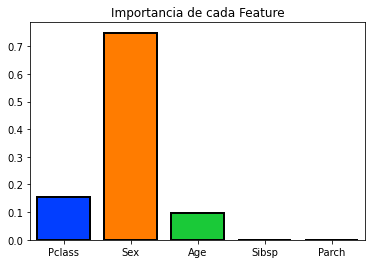

In [39]:
import seaborn as sns

importances = tree.feature_importances_
columns = x.columns
#data = pd.DataFrame([importances], columns=columns)

sns.barplot(columns,importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()